In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# scikit-learn library
from sklearn import linear_model,datasets
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("homeprices.csv")
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  680000
4  4000       5.0    8  725000

### Creating LR object

In [3]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [4]:
df1=pd.read_csv("predicted.csv")
df1

area  price
0  3300    NaN
1  4000    NaN
2  5000    NaN

In [5]:
df1.price= reg.predict(df1[['area']])
df1

area          price
0  3300  628715.753425
1  4000  723767.123288
2  5000  859554.794521

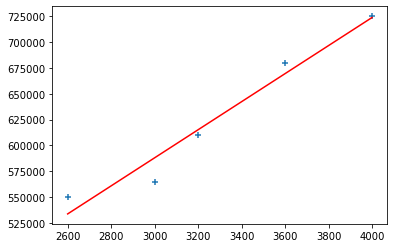

In [6]:
plt.scatter(df.area,df.price,marker="+")
plt.plot(df.area,reg.predict(df[["area"]]),color="red")

### Mean Squared Error

In [7]:
print("Mean Squared Error: ",mean_squared_error(df.price,reg.predict(df[['area']])))
# y=mx+c
print("Weights: ",reg.coef_) # m in y=mx+c
print("Intercept: ",reg.intercept_) # c in y=mx+c

Mean Squared Error:  186815068.4931509
Weights:  [135.78767123]
Intercept:  180616.43835616432


## Example

In [8]:
dia=datasets.load_diabetes()
dia.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [9]:
dia_x=dia.data[:,np.newaxis,2]
dia_x_train=dia_x[:-30]
dia_x_test=dia_x[-30:]

dia_y_train=dia.target[:-30]
dia_y_test=dia.target[-30:]

#creating LR object
reg1=linear_model.LinearRegression()
reg1.fit(dia_x_train,dia_y_train)

dia_y_predicted=reg1.predict(dia_x_test)

In [10]:
print("Mean Squared Error: ",mean_squared_error(dia_y_test,dia_y_predicted))
# y=mx+c
print("Weights: ",reg1.coef_) # m in y=mx+c
print("Intercept: ",reg1.intercept_) # c in y=mx+c

Mean Squared Error:  3035.0601152912686
Weights:  [941.43097333]
Intercept:  153.39713623331698


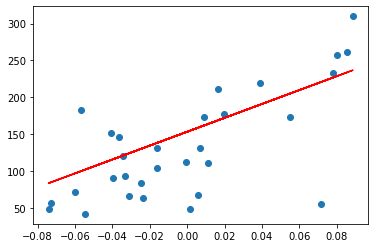

In [11]:
plt.scatter(dia_x_test,dia_y_test)
plt.plot(dia_x_test,dia_y_predicted,color="red")